# 캘리포니아 주택 가격 예측 모델 만들기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 1. 데이터 가져오기

In [ ]:
housing = pd.read_csv('./datasets/housing.csv')

## 2. 데이터 훑어보기

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**범주형 특성 탐색**

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**수치형 특성 탐색**

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**수치형 특성별 히스토그램**

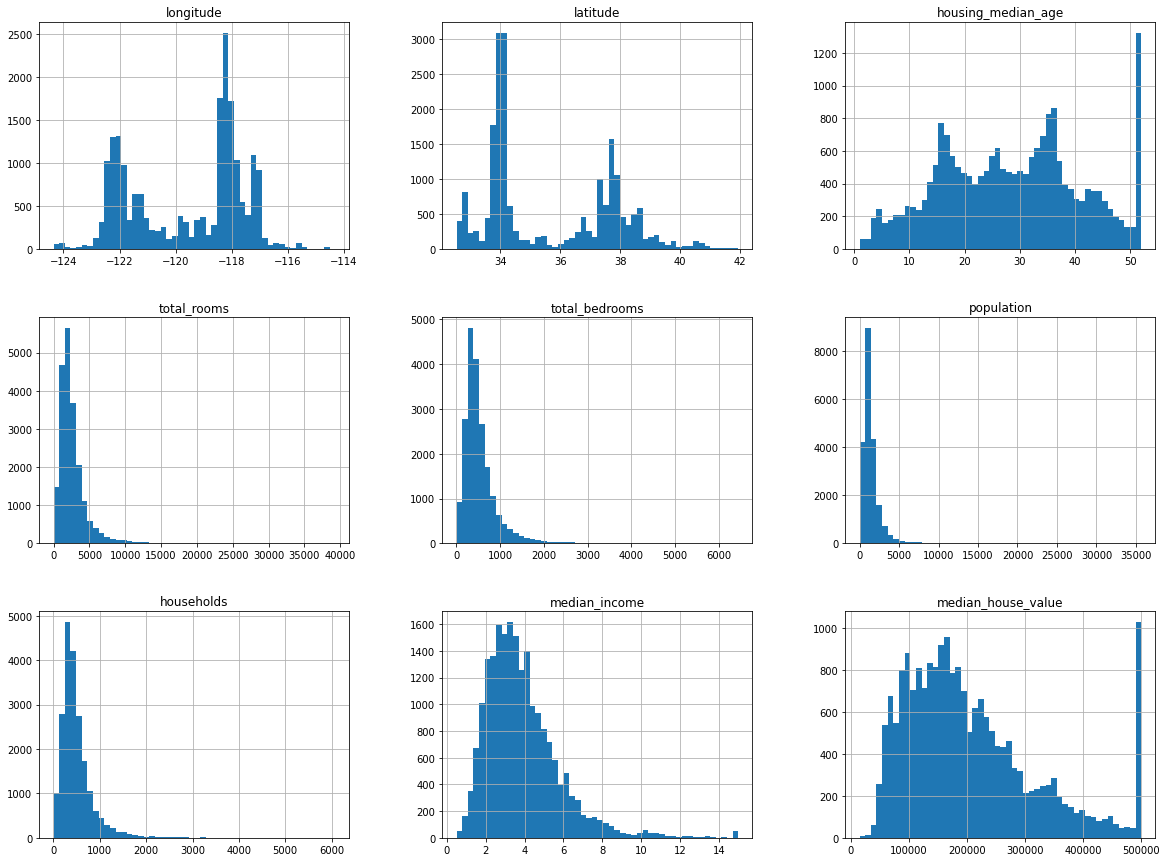

In [ ]:
h = housing.hist(bins=50, figsize=(20, 15))

## 3. 데이터 세트 분리
- 훈련 데이터/ 테스트 데이터

**계층적 샘플링(Straityfied sampling)**

In [ ]:
bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf]
labels = [1, 2, 3, 4, 5]
housing['income_cat'] = pd.cut(housing['median_income'], bins=bins, labels=labels)

In [ ]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [ ]:
housing['income_cat'].value_counts() # 도수

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [ ]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, stratify=housing['income_cat'], test_size=0.2, random_state=42)

In [ ]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

**데이터 되돌리기**

In [ ]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

## 4. 데이터 탐색

**탐색적 데이터분석**
- 어떤 특성을 선택할지, 제거할지, 조합을 통해서 더 좋은 특성을 만들 수 있는지를 분석
- 시각화(데이터의 경향성, 왜곡, 특잇값, 통계적정보)
- 상관관계, 누락데이터(결측치)를 종합적으로 분석
- 탐색적 데이터 분석의 결과로 모델링 방향을 결정할 수 있음

In [ ]:
# 훈련셋만을 대상으로 탐색과 시각화를 적용 (strat_test_set는 최종 예측에 사용)
housing = strat_train_set.copy()

### 4.1 지리적 데이터 시각화

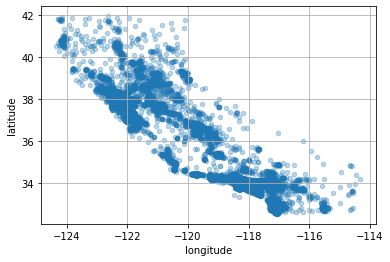

In [ ]:
# longitude(경도) : 동서
# latitude(위도) : 남북
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, grid=True)

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

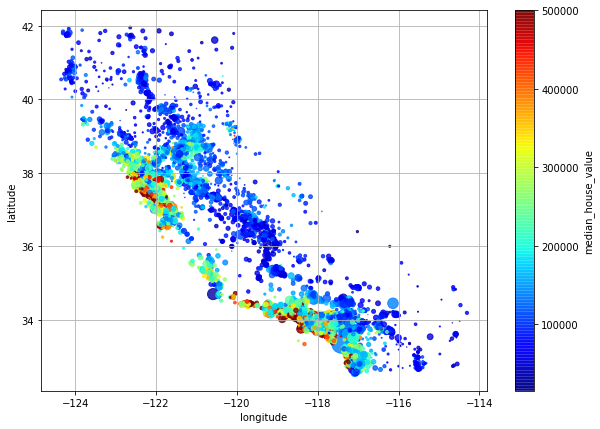

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.8, grid=True,
             c = 'median_house_value', cmap='jet', colorbar=True, figsize=(10, 7), # color 를 통해서 주택가격 표시
             s = housing['population']/100,  sharex=False) # size를 통해서 인구수를 표시

**지리적 데이터 분석결과**
: 해안가이면서 밀집 지역일수록 주택가격이 높음

### 4.2 상관관계 조사

- 상관계수

In [ ]:
# 모든 수치형 특성간의 상관계수 확인
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [ ]:
# 중간 주택 가격(타깃)과 다른 특성간의 상관관계 확인

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- 산점도

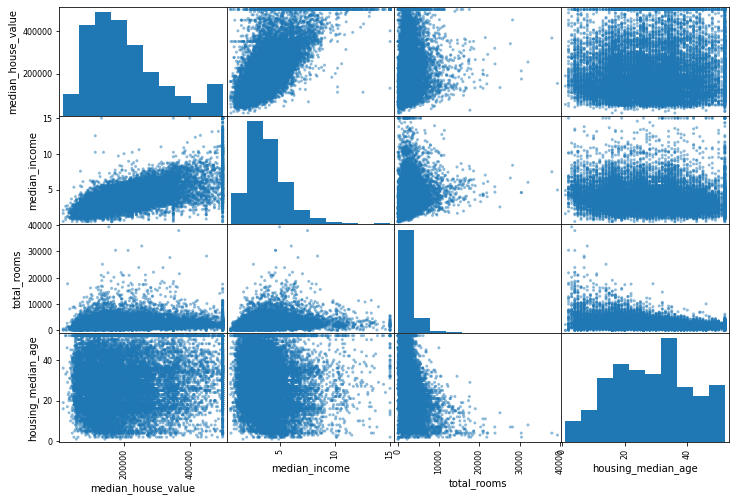

In [ ]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

obj = pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show() # python script에서는 해줘야 함

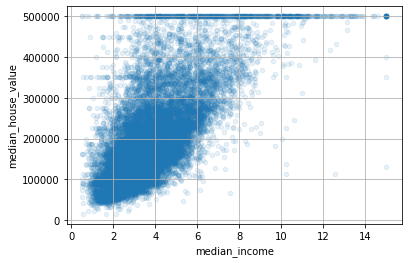

In [ ]:
# 중간 주택 가격(타깃)과 중간소득의 산점도
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)

### 4.3 특성 조합을 실험

In [ ]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

## 5. 데이터 전처리

In [ ]:
# strat_train_set (시각화, 전처리)
# strat_test_set (최종 예측)

In [ ]:
# 특성과 레이블을 분리
housing = strat_train_set.drop('median_house_value', axis=1) # 특성 (X 데이터)
housing_label = strat_train_set['median_house_value'].copy() # 레이블 (y 데이터)

### 5.1 데이터 전처리(1) - 결손값 처리

**결손값(Null/NaN) 처리 방법**

- 옵션1 : 해당 구역 제거
- 옵션2 : 전체 특성 삭제
- 옵션3 : 어떤 값으로 대체(0, 평균, 중간값 등)


**scikit-learn의 전처리기를 이용하여 옵션3 을 처리**

In [ ]:
# <scikit-learn의 전처리기들 예시>
# preprocessing -> PolynomialFeatures 
# preprocessing -> StandardScaler
# impute -> SimpleImputer
# OneHotEncoder
# LabelEncoder, OrdinalEncoder
# MinMaxScaler
# 함수를 이용한 전처리 
# 나만의 전처리기

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)
# housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
# SimpleImputer를 결측값을 대체(옵션3) 할 수 있음
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # 변환기 객체 생성
imputer.fit(housing_num) # 변환할 준비 : 중앙값을 구함

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# 위의 statistics_ 값과 동일
housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [ ]:
X = imputer.transform(housing_num) # 실제 변환

In [ ]:
# housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
# housing_num_tr.info()

### 5.2 데이터 전처리(2) - 데이터 인코딩
- 데이터 인코딩을 하는 이유는 머신러닝에서 수치값만 기대하기 때문

In [ ]:
housing_cat = housing[['ocean_proximity']] # 2차원의 dataframe으로 준비

#### (1) 레이블 인코딩

In [ ]:
# pandas
pd.factorize(housing['ocean_proximity'])

(array([0, 1, 0, ..., 2, 2, 0]),
 Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [ ]:
# scikit-learn 변환기
from sklearn.preprocessing import OrdinalEncoder # LabelEncoder는 1차원 데이터를 기대

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(housing_cat)

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

#### (2) 원핫 인코딩
숫자의 크기가 모델 훈련과정에서 잘못된 영향을 줄 수 있으므로 원핫 인코딩

In [ ]:
# pandas
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


In [ ]:
# scikit-learn 변환기
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(housing_cat)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 5.3 데이터 전처리(3) - 특성 스케일링
- 표준화 (Z score Standardize) : 평균 0, 표준편차 1
- 정규화 (Min Max Scaling) : 0~1 사이로 정규화 (참고 : 특잇값에 영향을 받음)
- 로그 스케일링 : 데이터의 분포가 왜곡되어 있을때 주로 사용

In [ ]:
arr = np.arange(9).reshape(3,3)

In [ ]:
Z_arr = (arr - arr.mean())/arr.std() # 표준화 공식
Z_arr.mean(), Z_arr.std()

(0.0, 1.0)

In [ ]:
M_arr = (arr - arr.min())/(arr.max()- arr.min()) # 정규화(0~1) 공식
M_arr.min(), M_arr.max()

(0.0, 1.0)

In [ ]:
# pandas
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr): # 평균 0, 표준편차 1
    return (arr - arr.mean())/arr.std()    

In [ ]:
# scikit-learn 변환기

In [ ]:
# 표준화 (Z score Standardize) : 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std = std_scaler.fit_transform(housing_num)
housing_num_std.mean(0), housing_num_std.std(0) # 0번축으로 각각의 컬럼별 평균/표준편차

(array([-5.24924634e-15,  2.81159678e-16,  8.77850764e-17, -1.54914841e-17,
                    nan,  6.45478503e-19, -1.05428155e-17,  1.14841384e-16]),
 array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.]))

In [ ]:
# 정규화 (Min Max Scaling) : 0~1 사이로 정규화 (참고 : 특잇값에 영향을 받음)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1)) # feature_range=(0, 1)가 기본값, 변경 가능
housing_num_mm = min_max_scaler.fit_transform(housing_num)
housing_num_mm.min(0), housing_num_mm.max(0)

(array([ 0.,  0.,  0.,  0., nan,  0.,  0.,  0.]),
 array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.]))

In [ ]:
# 로그 스케일링 : 데이터의 분포가 왜곡되어 있을때 주로 사용
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log)
log_population = log_transformer.fit_transform(housing_num[['population']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89c60236a0>]],
      dtype=object)

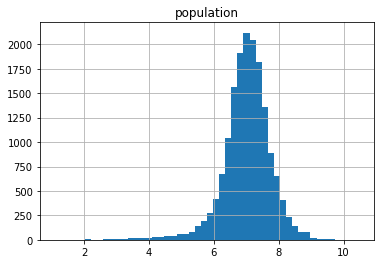

In [ ]:
log_population.hist(bins=50) # 변환후

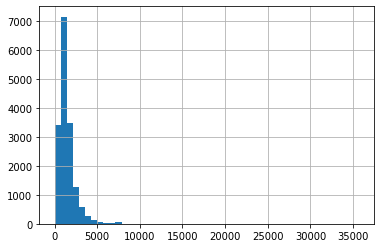

In [ ]:
housing_num['population'].hist(bins=50) # 변환전

### 5.4 데이터 전처리(4) - 변환 파이프라인

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline 

```
# 나만의 변환기

# 1. 아래 형식을 그대로 가져가기

from sklearn.base import BaseEstimator, TransformerMixin

class 나만의변환기(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):
        # todo
        return 변형된 데이터
        
# 2. transform 함수 위주로 코드를 채우기

# 3. 변환기 초기 값이 필요하다면 __init__ 함수 채우기
#    변환 준비를 해야 한다면 fit() 함수 채우기
```

In [ ]:
# housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
# housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
# housing['population_per_household'] = housing['population'] / housing['households']

# 수치형 데이터를 위한 파이프라인(1) - 특성조합 실험 (비율 특성 추가)
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = 0
bedrooms_ix = 1
population_ix = 2
households_ix = 3

class CombinedAtrributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):        
        return self

    def transform(self, X):
        rooms_per_households = X[:, rooms_ix] / X[:, households_ix]
        bedrooms_per_rooms = X[:, bedrooms_ix] / X[:, rooms_ix]
        population_per_households = X[:, population_ix] / X[:, households_ix]
        return np.c_[rooms_per_households, bedrooms_per_rooms, population_per_households]

# adder = CombinedAtrributesAdder()
# adder.fit_transform(housing_num[['total_rooms', 'total_bedrooms', 'population', 'households']].values)



ratio_add_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('ratio_adder', CombinedAtrributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])

In [ ]:
# 참고
# # 변환기에 데이터프레임이 들어왔을때 처리
# ratio_transformer = FunctionTransformer(lambda X: X.iloc[:, 0] / X.iloc[:, 1])
# ratio_transformer.fit_transform(housing[['total_rooms', 'households']])
# # 변환기에 넘파이가 들어왔을때 처리
# ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
# ratio_transformer.fit_transform(housing[['total_rooms', 'households']].values)

In [ ]:
# 수치형 데이터를 위한 파이프라인(2) - 왜곡된 수치형 데이터 로그 변환

# log_transformer = FunctionTransformer(np.log)

log_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('log_transformer', FunctionTransformer(np.log)),
                         ('std_scaler', StandardScaler())
                        ])


In [ ]:
# 수치형 데이터를 위한 파이프라인(3)
from sklearn.cluster import KMeans

kmeans = KMeans(10, random_state=42)
kmeans.fit(housing[["longitude", "latitude"]], sample_weight=housing_label)

KMeans(n_clusters=10, random_state=42)

In [ ]:
kmeans.labels_

array([7, 5, 8, ..., 2, 2, 4], dtype=int32)

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = np.unique(kmeans.labels_)

In [ ]:
cluster_centers[:, 0].shape, cluster_centers[:, 1].shape

((10,), (10,))

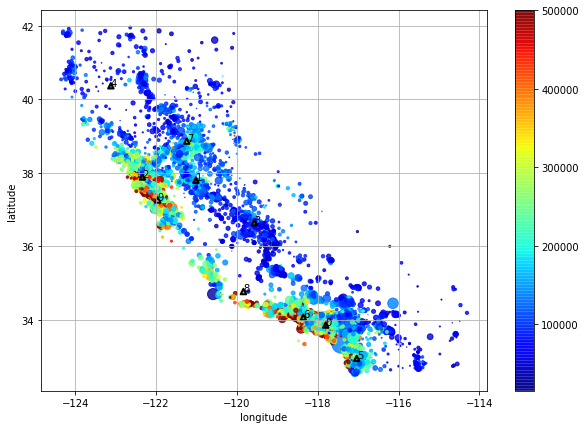

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.8, grid=True,
             c= housing_label, cmap='jet', colorbar=True, figsize=(10, 7), # color 를 통해서 주택가격 표시
             s = housing['population']/100,  sharex=False) # size를 통해서 인구수를 표시

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = cluster_labels,
            marker='^', linewidths=2, edgecolors='k', s=30)    

for cluster_label in cluster_labels:
  plt.annotate(cluster_label, (cluster_centers[cluster_label, 0], cluster_centers[cluster_label, 1]))           

In [ ]:
kmeans.labels_[:5]

array([7, 5, 8, 5, 6], dtype=int32)

In [ ]:
housing[['longitude', 'latitude']].head(5)

,longitude,latitude
12655,-121.46,38.52
15502,-117.23,33.09
2908,-119.04,35.37
14053,-117.13,32.75
20496,-118.70,34.28


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

simil = rbf_kernel(housing[['longitude', 'latitude']], kmeans.cluster_centers_, gamma=1.0)

In [ ]:
simil[:5].round(2)

array([[0.  , 0.49, 0.31, 0.  , 0.  , 0.  , 0.  , 0.85, 0.  , 0.16],
       [0.4 , 0.  , 0.  , 0.  , 0.  , 0.95, 0.11, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.15, 0.  , 0.  , 0.12, 0.  , 0.37, 0.  ],
       [0.19, 0.  , 0.  , 0.  , 0.  , 0.95, 0.04, 0.  , 0.  , 0.  ],
       [0.37, 0.  , 0.  , 0.  , 0.  , 0.01, 0.85, 0.  , 0.21, 0.  ]])

In [ ]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None): # 지리 정보를 군집시킴
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X): # 군집된 위치로부터 유사도를 구함
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)        
        

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)        
# similarities = cluster_simil.fit_transform(housing[['longitude', 'latitude']], sample_weight=housing_label)
# similarities.round(2)

In [ ]:
# 수치형 데이터를 위한 파이프라인(4)

# 누락된 데이터를 중앙값으로 대체
# ---> 표준화

from sklearn.pipeline import Pipeline 

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())
                        ])
# num_pipeline.fit_transform(housing_num)

In [ ]:
# 범주형 데이터를 위한 파이프라인
# --> 원핫 인코딩

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
ratio_attribs = ['total_rooms', 'total_bedrooms', 'population', 'households']
log_attribs = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
geo_attribs = ['longitude', 'latitude']
num_attribs = ['housing_median_age']

cat_attrib = ['ocean_proximity']

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([('ratio_add_pipeline', ratio_add_pipeline, ratio_attribs),
                                   ('log_pipeline', log_pipeline, log_attribs),
                                   ('cluster_simil', cluster_simil, geo_attribs),
                                   ('num_pipeline', num_pipeline, num_attribs),
                                   ('onehot_encoder', OneHotEncoder(), cat_attrib)])


In [ ]:
from sklearn import set_config

set_config(display='diagram')

In [ ]:
full_pipeline

ColumnTransformer(transformers=[('ratio_add_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('ratio_adder',
                                                  CombinedAtrributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['total_rooms', 'total_bedrooms', 'population',
                                  'households']),
                                ('log_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transformer',
                                                  Fun...
                                                  StandardScaler())]),
                                 ['total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cluster_simil',
                                 ClusterSimilarity(random_state=42),
                                 ['longitude', 'latitude']),
                                ('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['housing_median_age']),
                                ('onehot_encoder', OneHotEncoder(),
                                 ['ocean_proximity'])])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 24)

In [ ]:
housing.shape

(16512, 9)

## 6. 모델 선택과 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

In [ ]:
# cross_val_score(모델, 특성, 정답, 성능측정지표, 폴드수)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = np.sqrt(-lin_scores).mean()
lin_rmse

71643.61806112822

In [ ]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse = np.sqrt(-tree_scores).mean()
tree_rmse

66289.57873982734

In [ ]:
rf_scores = cross_val_score(rf_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
rf_rmse = np.sqrt(-rf_scores).mean()
rf_rmse

47369.00852033474

## 7. 모델 세부 튜닝

**그리드 탐색**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {'n_estimators':[30, 50, 100], 'max_features':[2, 4, 6, 8]} # 3*4 

# GridSearchCV(모델, 탐색할파라미터, 성능측정기준, 폴드수)
grid_search = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # 3*4*5
%time grid_search.fit(housing_prepared, housing_label)

CPU times: user 6.63 s, sys: 191 ms, total: 6.82 s
Wall time: 1min 39s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, random_state=42)

In [ ]:
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
  print(np.sqrt(-mean_score), params)

47615.78793693111 {'max_features': 2, 'n_estimators': 30}
46848.357401232766 {'max_features': 2, 'n_estimators': 50}
46527.97900463248 {'max_features': 2, 'n_estimators': 100}
45784.281948751646 {'max_features': 4, 'n_estimators': 30}
45304.55940654072 {'max_features': 4, 'n_estimators': 50}
44844.10016711317 {'max_features': 4, 'n_estimators': 100}
45431.692834543544 {'max_features': 6, 'n_estimators': 30}
44908.00963839459 {'max_features': 6, 'n_estimators': 50}
44604.412591927685 {'max_features': 6, 'n_estimators': 100}
45894.32583101478 {'max_features': 8, 'n_estimators': 30}
45406.67190675661 {'max_features': 8, 'n_estimators': 50}
45233.370160062215 {'max_features': 8, 'n_estimators': 100}


**랜덤 탐색**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators' : randint(low=1, high=200), 'max_features' : randint(low=1, high=8)}


# RandomizedSearchCV(모델, 탐색할파라미터, 반복횟수, 성능측정기준, 폴드수)
rnd_search = RandomizedSearchCV(rf_reg, param_distribs, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # 10*5
%time rnd_search.fit(housing_prepared, housing_label)

CPU times: user 8.02 s, sys: 265 ms, total: 8.28 s
Wall time: 1min 51s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f89c58ee760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f89c15fd190>},
                   scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 148}

In [ ]:
best_model = rnd_search.best_estimator_

In [ ]:
for mean_score, params in zip(rnd_search.cv_results_['mean_test_score'], rnd_search.cv_results_['params']):
  print(np.sqrt(-mean_score), params)

45041.17559402447 {'max_features': 7, 'n_estimators': 67}
49142.8989525044 {'max_features': 1, 'n_estimators': 182}
45838.02282862189 {'max_features': 3, 'n_estimators': 32}
44689.705578972265 {'max_features': 5, 'n_estimators': 111}
45219.96029990556 {'max_features': 5, 'n_estimators': 35}
45701.625405602914 {'max_features': 5, 'n_estimators': 24}
44635.08787518186 {'max_features': 5, 'n_estimators': 171}
46353.03645864625 {'max_features': 2, 'n_estimators': 144}
44622.8066386892 {'max_features': 5, 'n_estimators': 148}
49148.9009528004 {'max_features': 1, 'n_estimators': 160}


In [166]:
ratio_attribs = ['rooms_per_household', 'bedrooms_per_rooms', 'population_per_household']
log_attribs = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
geo_attribs = ['geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity']
num_attribs = ['housing_median_age']

cat_attib = ['ocean_proximity1', 'ocean_proximity2', 'ocean_proximity3', 'ocean_proximity4', 'ocean_proximity5']

total_attrib = ratio_attribs + log_attribs + geo_attribs + num_attribs + cat_attib

In [167]:
feature_importances = best_model.feature_importances_

In [168]:
sorted(zip(feature_importances, total_attrib), reverse=True)

[(0.24755816625206178, 'median_income'),
 (0.11537992522422691, 'ocean_proximity2'),
 (0.07963167731931024, 'population_per_household'),
 (0.07765768585168915, 'bedrooms_per_rooms'),
 (0.06135284195908791, 'rooms_per_household'),
 (0.06051770420641741, 'geo__Cluster 3 similarity'),
 (0.03991320893016922, 'geo__Cluster 8 similarity'),
 (0.03914236105766442, 'geo__Cluster 6 similarity'),
 (0.033763526108775824, 'geo__Cluster 9 similarity'),
 (0.02989571572896484, 'geo__Cluster 5 similarity'),
 (0.02976718939949129, 'geo__Cluster 0 similarity'),
 (0.027338571567170268, 'geo__Cluster 7 similarity'),
 (0.026215031022038978, 'housing_median_age'),
 (0.024095412193519312, 'geo__Cluster 2 similarity'),
 (0.017820157292636855, 'geo__Cluster 1 similarity'),
 (0.017524583922019863, 'geo__Cluster 4 similarity'),
 (0.014394978024312666, 'total_rooms'),
 (0.013805569789252953, 'population'),
 (0.012544058746935921, 'households'),
 (0.01245416523488028, 'total_bedrooms'),
 (0.011051546545215746, 'oce

## 8. 모델 예측과 성능 평가

In [ ]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test.shape, y_test.shape

((4128, 9), (4128,))

In [ ]:
# 훈련데이터를 변경할때는 파이프라인의 fit_transform()을 사용
# 테스트데이터를 변경할때는 파이프라인의 transform()을 사용

X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(4128, 24)

In [ ]:
final_predictions = best_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error

final_rmse = mean_squared_error(y_test, final_predictions, squared=False) # RMSE
final_rmse

42556.540244753676

In [ ]:
full_pipeline_with_predictor = Pipeline([
                                  ('preparation', full_pipeline),
                                  ('final', best_model)
                              ])

## 9. 모델 저장

In [ ]:
import joblib

joblib.dump(full_pipeline_with_predictor, 'my_model.pkl')

['my_model.pkl']

In [ ]:
loaded_model = joblib.load('my_model.pkl')

In [ ]:
final_predictions2= loaded_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, final_predictions2, squared=False)

42556.540244753676